In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

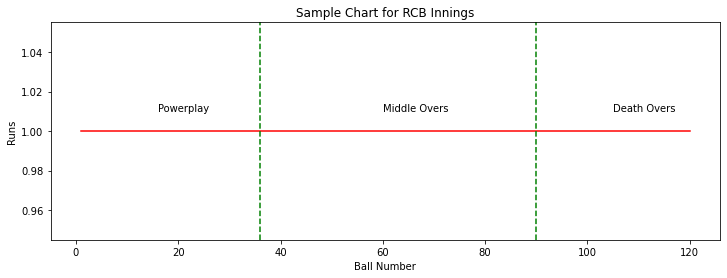

In [2]:
x = [i for i in range(1, 121)]
y = [1 for i in range(1, 121)]

plt.figure(figsize = (12, 4))
plt.plot(x, y, c = 'r')

plt.axvline(x = 36, ls = '--', c = 'g')
plt.axvline(x = 90, ls = '--', c = 'g')

plt.text(16, 1.01, "Powerplay")
plt.text(60, 1.01, "Middle Overs")
plt.text(105, 1.01, "Death Overs")

plt.xlabel("Ball Number")
plt.ylabel("Runs")
plt.title("Sample Chart for RCB Innings")
plt.show()

In [86]:
df = pd.read_csv('deliveries.csv')

In [87]:
df.match_id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [88]:
# step 1: Populate runs for both innings
# step 2: Populate wickets for both innings

In [89]:
def show_summary(df, matchID):

    df = df[df.match_id == matchID]

    df1 = df[df.inning == 1]
    df2 = df[df.inning == 2]

    df1.reset_index(inplace = True, drop = True)
    df2.reset_index(inplace = True, drop = True)

    df1['cum_runs'] = 0
    df2['cum_runs'] = 0

    runs_count = 0
    for i in range(len(df1)):
        runs_count += df1['total_runs'][i]
        df1['cum_runs'][i] = runs_count

    runs_count = 0
    for i in range(len(df2)):
        runs_count += df2['total_runs'][i]
        df2['cum_runs'][i] = runs_count

    ball_no_ing1 = [i for i in range(1, len(df1) + 1)]
    ball_no_ing2 = [i for i in range(1, len(df2) + 1)]

    wk_index1 = list(df1[~df1.player_dismissed.isna()].index)
    wk_index2 = list(df2[~df2.player_dismissed.isna()].index)

    wk_runs1 = list(df1[df1.index.isin(wk_index1)].cum_runs)
    wk_runs2 = list(df2[df2.index.isin(wk_index2)].cum_runs)

    team1 = df1.batting_team[0]
    team2 = df2.batting_team[0]

    plt.figure(figsize = (16, 6))

    plt.plot(ball_no_ing1, df1.cum_runs, linewidth = 3, label = team1)
    plt.plot(ball_no_ing2, df2.cum_runs, linewidth = 3, label = team2)

    plt.scatter(wk_index1, wk_runs1, s = 150)
    plt.scatter(wk_index2, wk_runs2, s = 150)

    plt.axvline(x = 36, ls = '--', c = 'g')
    plt.axvline(x = 90, ls = '--', c = 'g')

    plt.text(16, 1.01, "Powerplay")
    plt.text(60, 1.01, "Middle Overs")
    plt.text(105, 1.01, "Death Overs")

    plt.xlabel("Ball Number")
    plt.ylabel("Runs")
    plt.title("Match Summary - Runs progression Chart")
    plt.legend()

    plt.show()

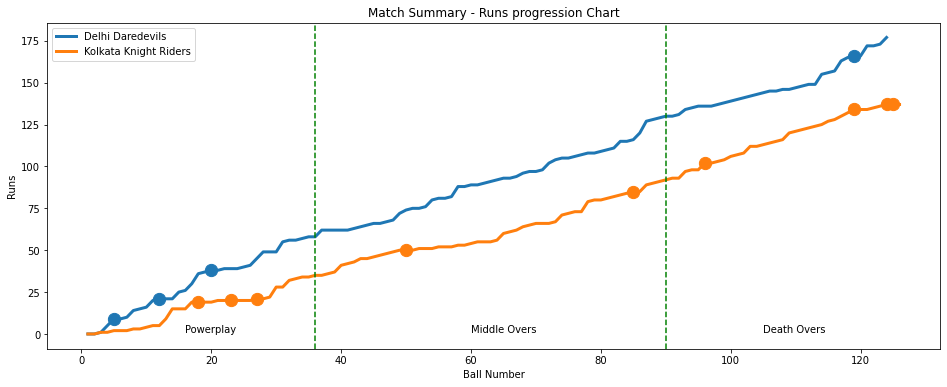

In [92]:
show_summary(df, 200)